In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Ecommerce_marketing_campaign.csv')

In [4]:
df['Age'] = 2022-df.Year_Birth

In [5]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x in ['Widow','Alone','Absurd','YOLO'] else x)

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,0,0,3,11,0,41


#### Missing Value handling

In [7]:
bins = [20,30,40,50,60,100]
age_tag = ['20-30','31-40','41-50','51-60','>60']
df['Age_tag'] = pd.cut(df['Age'],bins,labels = age_tag)

In [8]:
missing = df[df.Income.isnull()]

In [9]:
missing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_tag
10,1994,1983,Graduation,Married,NaN,1,0,11/15/2013,11,5,...,0,0,0,0,0,3,11,0,39,31-40
27,5255,1986,Graduation,Single,NaN,1,0,2/20/2013,19,5,...,0,0,0,0,0,3,11,0,36,31-40
43,7281,1959,PhD,Single,NaN,0,0,11/5/2013,80,81,...,0,0,0,0,0,3,11,0,63,>60
48,7244,1951,Graduation,Single,NaN,2,1,1/1/2014,96,48,...,0,0,0,0,0,3,11,0,71,>60
58,8557,1982,Graduation,Single,NaN,1,0,6/17/2013,57,11,...,0,0,0,0,0,3,11,0,40,31-40
71,10629,1973,2n Cycle,Married,NaN,1,0,9/14/2012,25,25,...,0,0,0,0,0,3,11,0,49,41-50
90,8996,1957,PhD,Married,NaN,2,1,11/19/2012,4,230,...,0,0,0,0,0,3,11,0,65,>60
91,9235,1957,Graduation,Single,NaN,1,1,5/27/2014,45,7,...,0,0,0,0,0,3,11,0,65,>60
92,5798,1973,Master,Together,NaN,0,0,11/23/2013,87,445,...,0,0,0,0,0,3,11,0,49,41-50
128,8268,1961,PhD,Married,NaN,0,1,7/11/2013,23,352,...,0,0,0,0,0,3,11,0,61,>60


In [10]:
income_mean = df.groupby(['Age_tag','Education'])['Income'].mean()

In [11]:
income_mean

Age_tag  Education 
20-30    2n Cycle      64593.500000
         Basic         14635.200000
         Graduation    65198.000000
         Master        67764.500000
         PhD                    NaN
31-40    2n Cycle      39176.289474
         Basic         19429.200000
         Graduation    45467.303571
         Master        45843.536585
         PhD           58421.519231
41-50    2n Cycle      41534.700000
         Basic         21076.000000
         Graduation    52055.646526
         Master        49641.868132
         PhD           53095.352000
51-60    2n Cycle      53663.176471
         Basic         21221.000000
         Graduation    52530.023810
         Master        52108.314286
         PhD           53702.156028
>60      2n Cycle      60367.119048
         Basic         23163.857143
         Graduation    56911.169935
         Master        58023.833333
         PhD           59725.444444
Name: Income, dtype: float64

In [12]:
for i, value in enumerate(missing.Income):
    missing.Income.iloc[i] = income_mean[missing['Age_tag'].iloc[i],missing['Education'].iloc[i]]

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [13]:
df.Income = df.Income.fillna(missing.Income)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   object  
 3   Marital_Status       2240 non-null   object  
 4   Income               2240 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntA                 2240 non-null   int64   
 10  MntB                 2240 non-null   int64   
 11  MntC                 2240 non-null   int64   
 12  MntD                 2240 non-null   int64   
 13  MntE                 2240 non-null   int64   
 14  MntF                 2240 non-null   int64   
 15  NumDealsPurchases    

### Build Machine Learning Models -- Decision Tree

#### 1. Prepare the training & testing set

In [15]:
df_model = df.drop(columns = ['Response','ID','Year_Birth','Dt_Customer','Age_tag'])

In [16]:
df_model = pd.get_dummies(df_model)

In [17]:
df_model.head().transpose()

,0,1,2,3,4
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0.0,1.0,0.0,1.0,1.0
Teenhome,0.0,1.0,0.0,0.0,0.0
Recency,58.0,38.0,26.0,26.0,94.0
MntA,635.0,11.0,426.0,11.0,173.0
MntB,88.0,1.0,49.0,4.0,43.0
MntC,546.0,6.0,127.0,20.0,118.0
MntD,172.0,2.0,111.0,10.0,46.0
MntE,88.0,1.0,21.0,3.0,27.0
MntF,88.0,6.0,42.0,5.0,15.0


In [37]:
df_model.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntA', 'MntB', 'MntC',
       'MntD', 'MntE', 'MntF', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together'],
      dtype='object')

#### 2. Split Training Set , Testing set

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
## Labels
y = df['Response']

In [23]:
train_x, test_x, train_y, test_y = train_test_split(df_model,y,test_size = .3,train_size = .7)

In [24]:
train_x.shape

(1568, 33)

In [25]:
test_x.shape

(672, 33)

#### 3. Build Decision Tree Model

In [26]:
# import tree model
import sklearn.tree as tree

# import Gridsearch for parameter selection
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'criterion':['entropy','gini'], 
              'max_depth':[2,3,4,5,6,7,8],  # tree depth
              'min_samples_split':[4,8,12,16,20,24,28] # min sample size of the leaf
             }

In [28]:
clf = tree.DecisionTreeClassifier()
clfcv = GridSearchCV(estimator = clf,param_grid = param_grid, scoring = 'roc_auc', cv = 4)

In [29]:
clfcv.fit(train_x,train_y)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [4, 8, 12, 16, 20, 24, 28]},
             scoring='roc_auc')

In [31]:
test_result = clfcv.predict(test_x)

In [32]:
import sklearn.metrics as metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y,test_result)
print(f"Decition tree AUC:{metrics.auc(fpr, tpr)}")

Decition tree AUC:0.65625


In [34]:
clfcv.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 20}

In [36]:
# use the best params into the decision tree, rebuild the model.
clf2 = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, min_samples_split= 20)
clf2.fit(train_x,train_y)
test_result2 =clf2.predict(test_x)

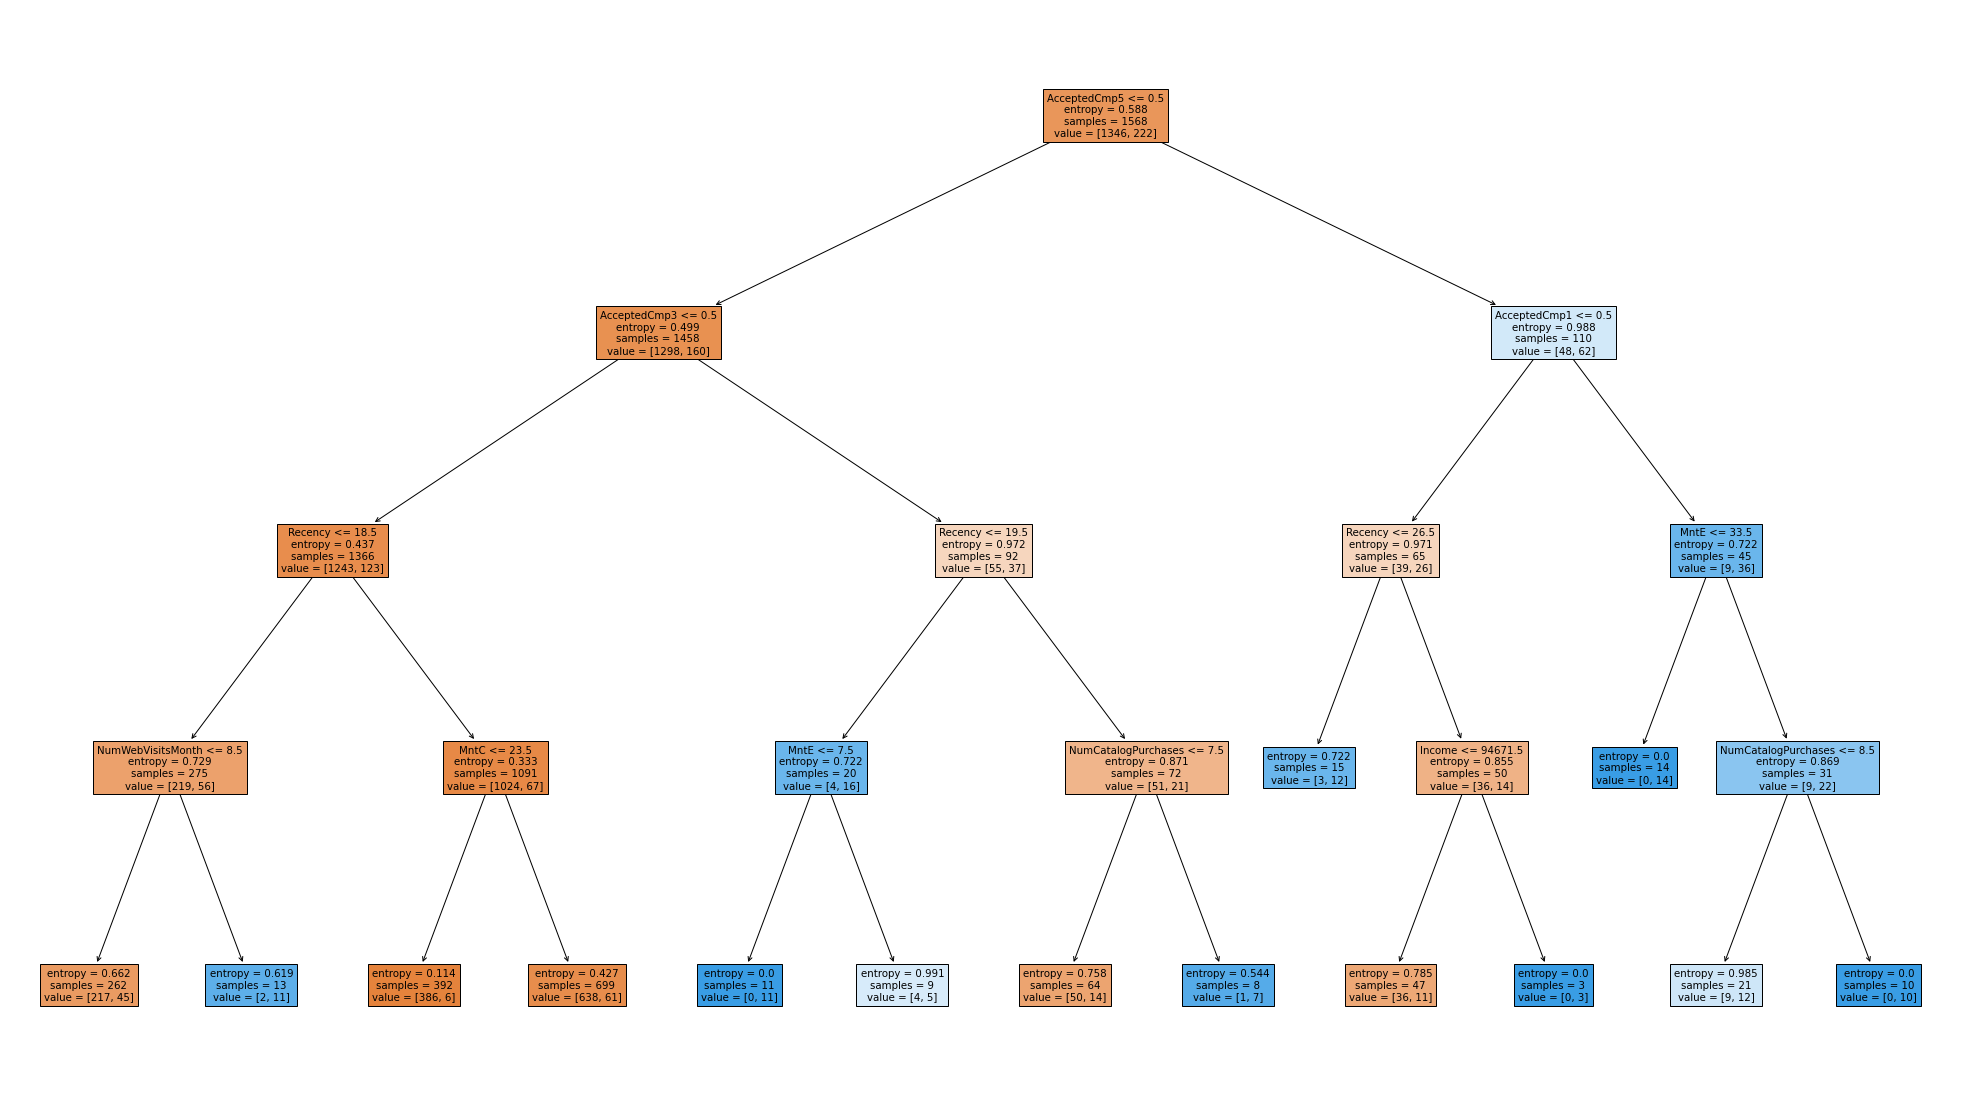

In [91]:
fig = plt.figure(figsize = (35,20))
tree.plot_tree(clf2,feature_names = df_model.columns,filled = True)
plt.show()

### Build Machine Learning Models -- Random Forest

In [54]:
# 1. Gridsearch
param_grid = {'criterion':['entropy','gini'], 
              'max_depth':[2,3,4,5,6,7,8,9],  # tree depth
              'n_estimators':[11,13,15], # 决策树的个数
              'max_features':[0.3,0.4,0.5], # 每棵决策树使用的变量占比
              'min_samples_split':[4,8,12,16,20,24,28] # min sample size of the leaf
             }

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
# define the model to be used for the training
rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(estimator = rfc,param_grid = param_grid,scoring = 'roc_auc',cv = 4)

In [61]:
# input the training features and label to train the model
rfc_cv.fit(train_x,train_y)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [0.3, 0.4, 0.5],
                         'min_samples_split': [4, 8, 12, 16, 20, 24, 28],
                         'n_estimators': [11, 13, 15]},
             scoring='roc_auc')

### Make prediction on test dataset

In [62]:
pred_test_y = rfc_cv.predict(test_x)

In [64]:
# compare the predict Y with the test_Y
# accuracy,confusion matrix, AUC
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,auc,roc_curve

In [65]:
#accuracy
test_accuracy = accuracy_score(test_y,pred_test_y)
print(f'Test accuracy:{round(test_accuracy,4)}')

Test accuracy:0.8601


In [66]:
# precision
precision_score(test_y,pred_test_y)

0.6875

In [67]:
#confusion matrix
confusion_matrix(test_y,pred_test_y)

array([[545,  15],
       [ 79,  33]], dtype=int64)

In [68]:
fpr, tpr, thresholds = roc_curve(pred_test_y, test_y)

In [69]:
print(f"Random Forest AUC: {auc(fpr,tpr)}")

Random Forest AUC: 0.780448717948718


In [85]:
# check for best param (maybe it is not, still need to adjust)
rfc_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.3,
 'min_samples_split': 6,
 'n_estimators': 20}

In [86]:
# adjust the 决策边界，调参
param_grid = {'criterion':['entropy','gini'], 
              'max_depth':[7,8,9,10,12],  # tree depth
              'n_estimators':[11,13,15,17,19,20,22,24], # 决策树的个数
              'max_features':[0.3,0.4,0.5,0.6], # 每棵决策树使用的变量占比
              'min_samples_split':[6,8,12,16,20,24] # min sample size of the leaf
             }
# 重复之前的步骤，再次train,
rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(estimator = rfc,param_grid = param_grid,scoring = 'roc_auc',cv = 4)

rfc_cv.fit(train_x,train_y)


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 8, 9, 10, 12],
                         'max_features': [0.3, 0.4, 0.5, 0.6],
                         'min_samples_split': [6, 8, 12, 16, 20, 24],
                         'n_estimators': [11, 13, 15, 17, 19, 20, 22, 24]},
             scoring='roc_auc')

In [87]:
pred_test_y = rfc_cv.predict(test_x)

test_accuracy = accuracy_score(test_y,pred_test_y)
print(f'Test accuracy:{round(test_accuracy,4)}')

fpr, tpr, thresholds = roc_curve(pred_test_y, test_y)
print(f"Random Forest AUC: {auc(fpr,tpr)}")

Test accuracy:0.8616
Random Forest AUC: 0.7755856785030205


In [88]:
rfc_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 0.6,
 'min_samples_split': 8,
 'n_estimators': 24}

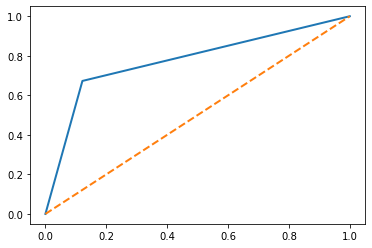

In [89]:
plt.plot(fpr,tpr,lw=2)
plt.plot([0,1],[0,1],lw=2,linestyle = '--')

In [90]:
import pickle
pickle.dump(clf,open('model_response','wb'))